In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import scipy.ndimage as ndimage
from skimage import measure, morphology, segmentation
import matplotlib.pyplot as plt
import math
import time
import cv2 as cv
from PIL import Image
import glob
import matplotlib.image as mpimg

In [ ]:
!pip install pydicom

In [4]:
# from skimage.transform import resize
# import cv2
# import pydicom
# import numpy as np
# from matplotlib import pyplot as plt
# example = '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/data/sample_train_data/ID00010637202177584971671/35.dcm'
# imagedata= pydicom.dcmread(example)
# img =imagedata.pixel_array
# name = example.split('/')[-1][:-4]
# img = resize(img,(512,512))
# cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/data/sample_png_train_data/ex_data/{}.png'.format(name), img * 255)
# print(imagedata.BitsAllocated)
# print(imagedata.PhotometricInterpretation)

## Reading png data

In [6]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/data/sample_png_train_data/'

In [16]:
os.listdir(data_path)

['ID00009637202177434476278',
 'ID00010637202177584971671',
 'ID00015637202177877247924',
 'ID00317637202283194142136',
 'ID00358637202295388077032']

In [ ]:
 # patients = dict()
# for patient_id in os.listdir(data_path):
#   images = []
#   for img_path in os.listdir(data_path+patient_id):
#      images.append(mpimg.imread(data_path + patient_id + "/" + img_path))
#   patients[patient_id] = images

In [57]:
sample_data = "ID00358637202295388077032/"


In [58]:
images_good = []
for img_path in os.listdir(data_path+sample_data):
    images_good.append(mpimg.imread(data_path + sample_data + img_path))

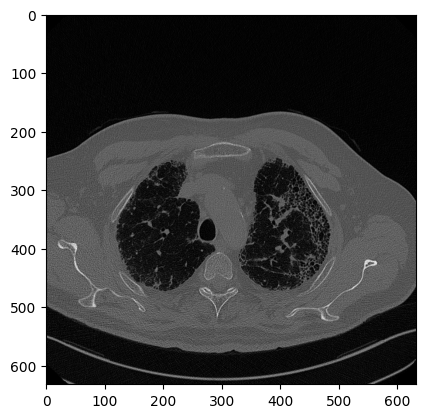

In [72]:

plt.imshow(images_good[90], cmap=("gray"))
plt.show()

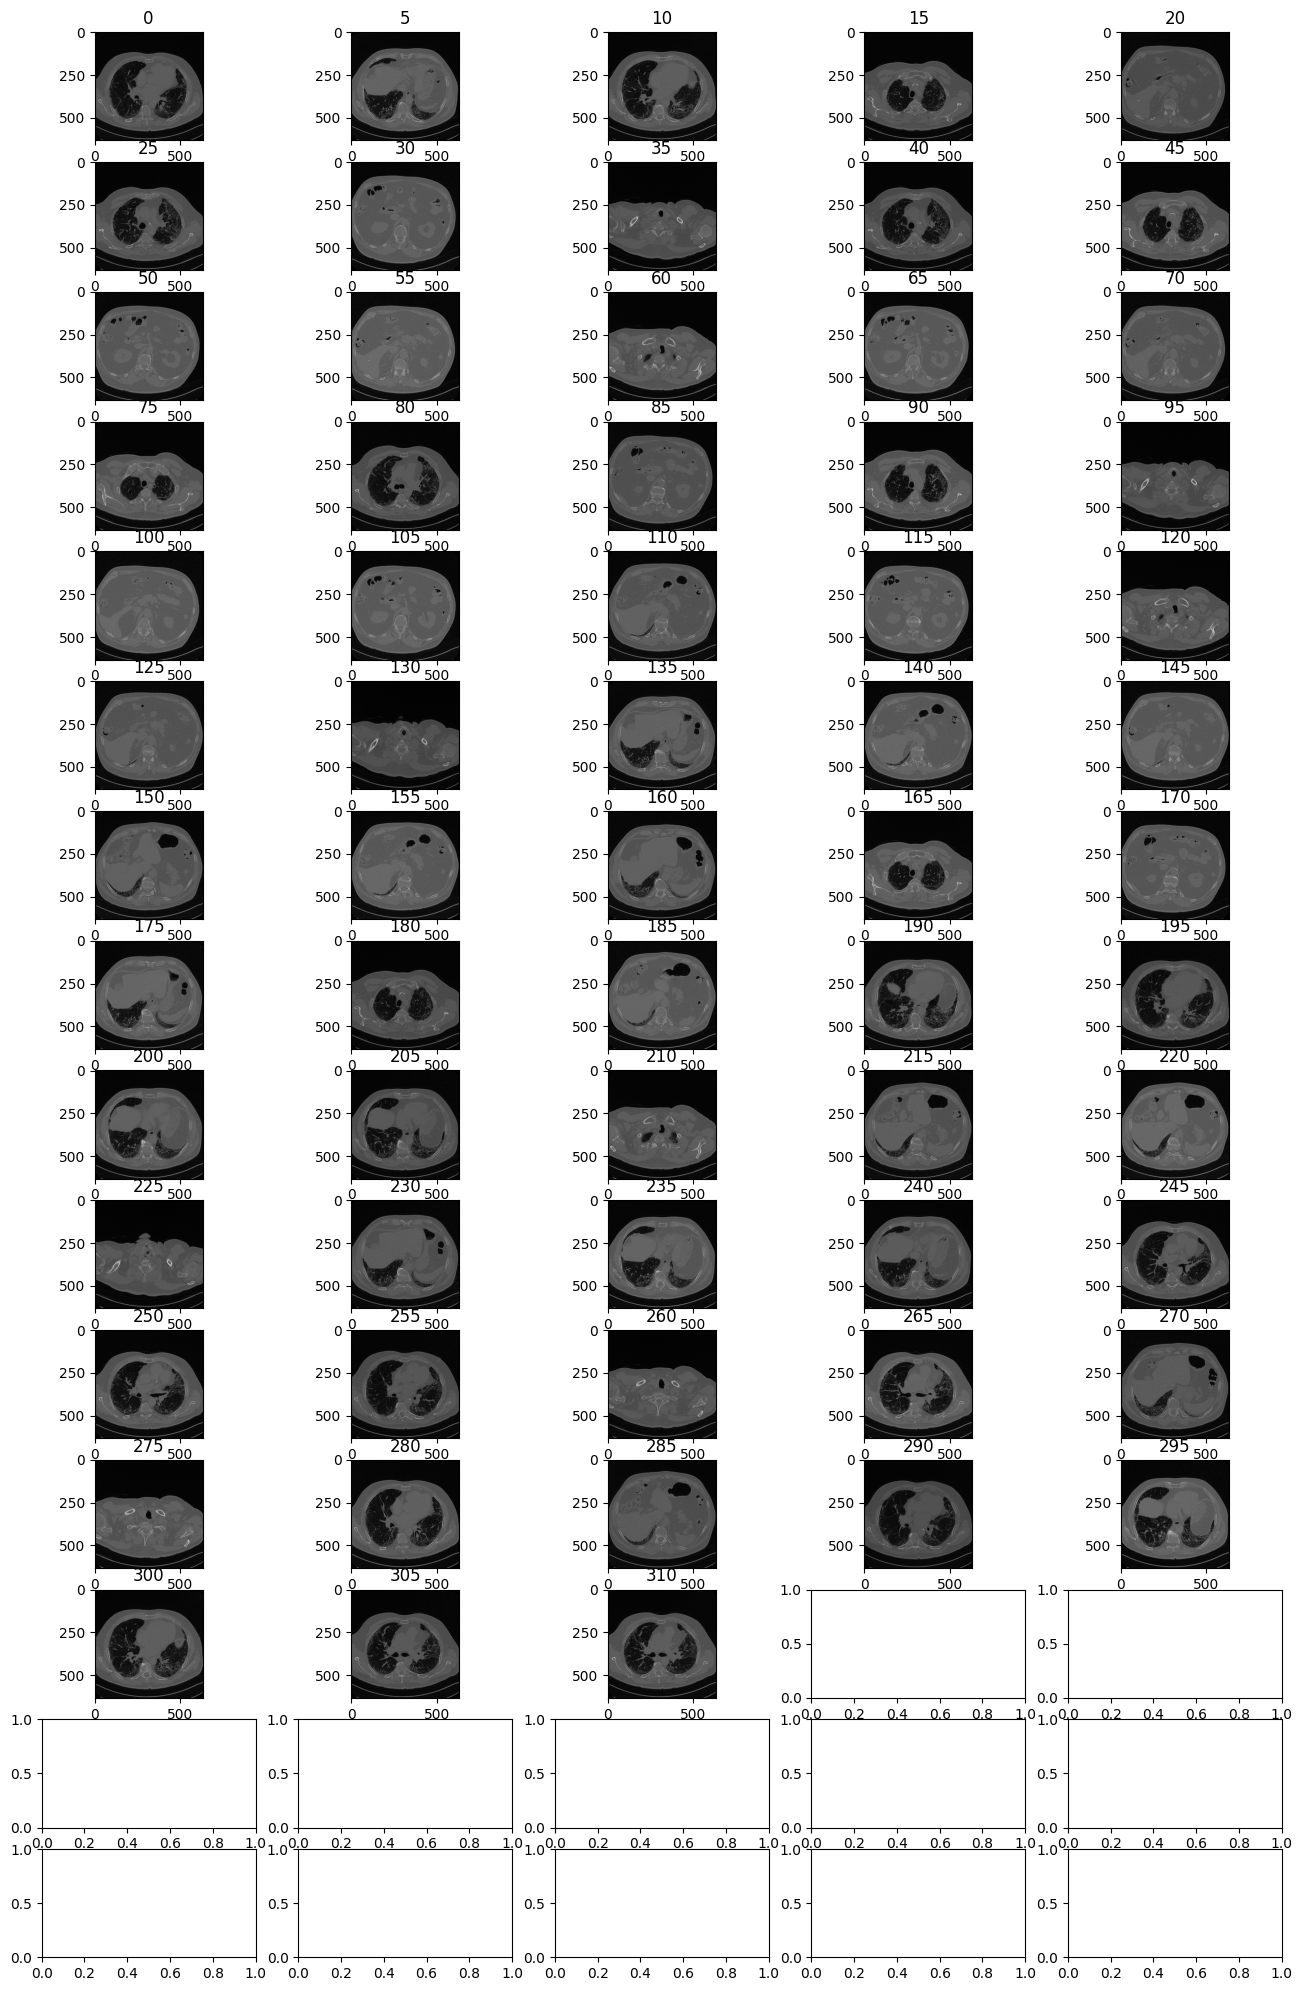

In [71]:
image_count = len(images_good)//4
fig, ax = plt.subplots(nrows = image_count // 5, ncols = 5,figsize=(16, 25))

for i, image in enumerate(images_good[::5]):

  ax[i//5,i%5].imshow(image, cmap="gray")
  ax[i//5,i%5].set_title(5*i)

plt.show()

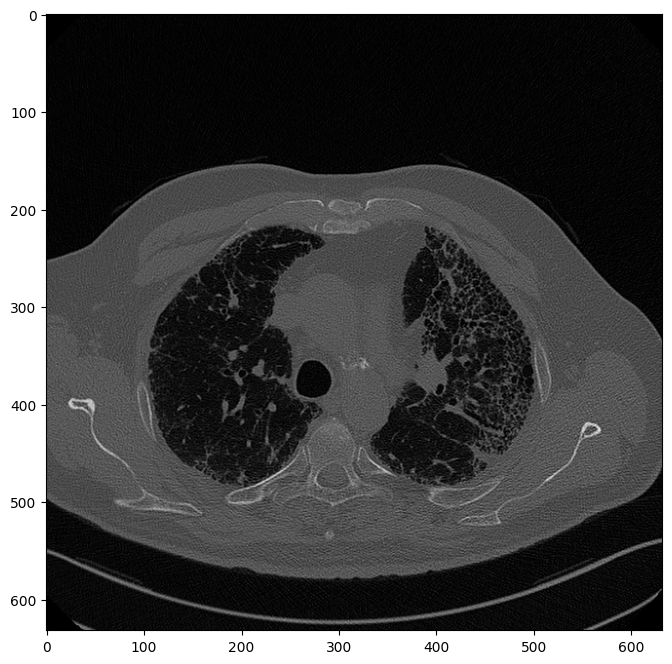

In [74]:
plt.figure(figsize=(12,8))
plt.imshow(images_good[40],cmap="gray")
plt.show()

In [75]:
ex_img_good = images_good[40]

In [76]:
ex_img_good *= 255

In [80]:
ex_img_good = ex_img_good.astype("uint8")

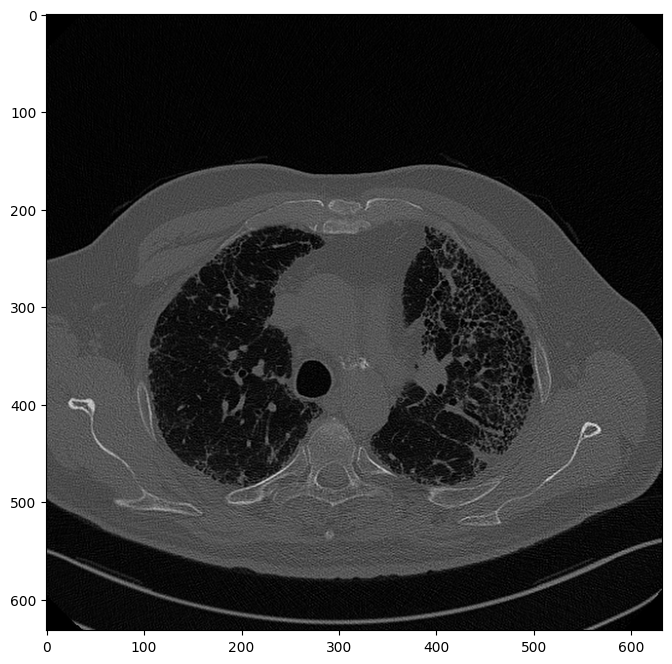

In [81]:
plt.figure(figsize=(12,8))
plt.imshow(ex_img_good,cmap="gray")
plt.show()

In [ ]:
sample_data = "ID00012637202177665765362/"

In [ ]:
images_bad = []
for img_path in os.listdir(data_path+sample_data):
    images_bad.append(mpimg.imread(data_path + sample_data + img_path))

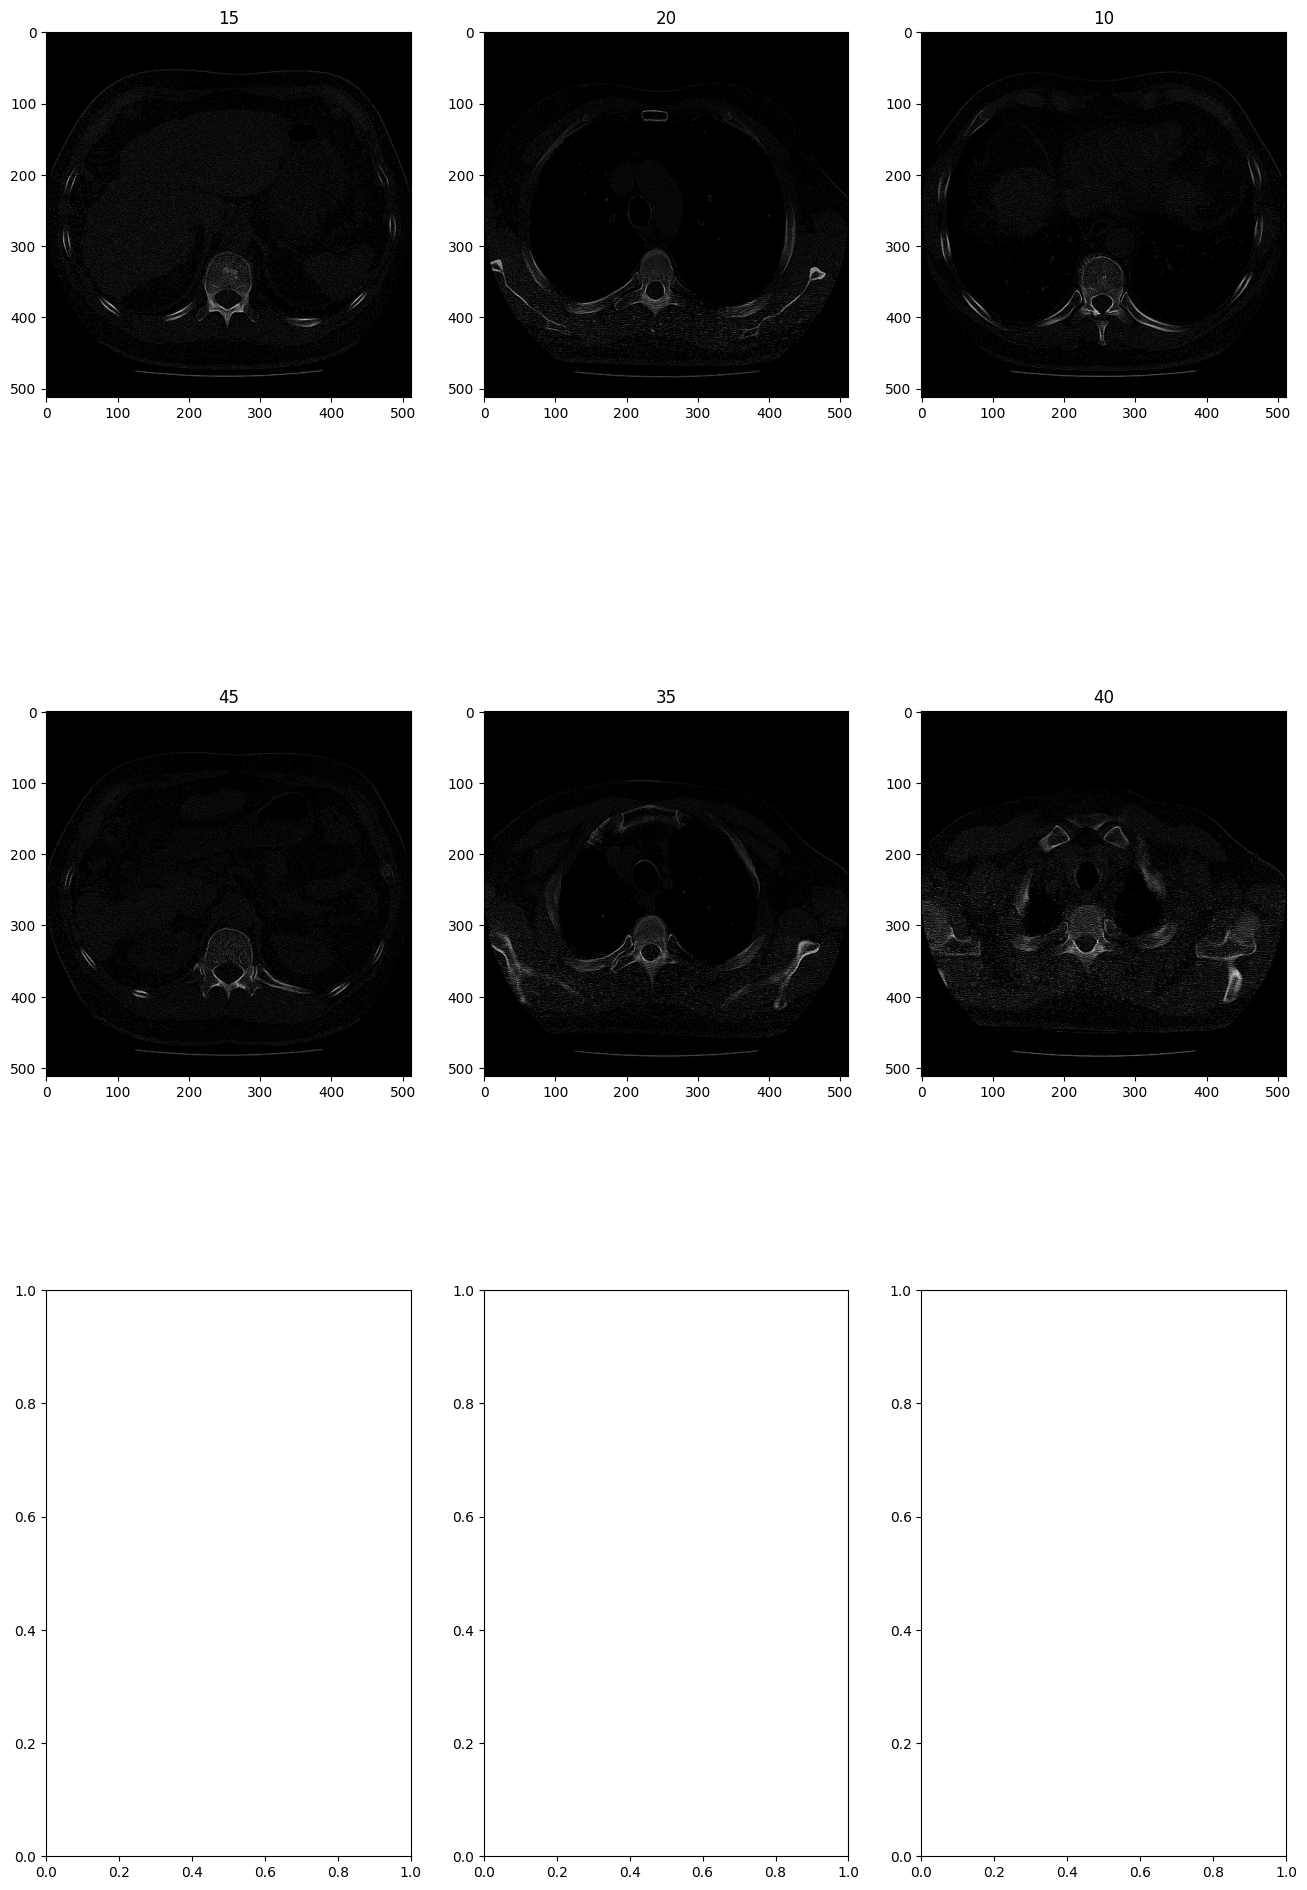

In [ ]:
image_count = len(images_bad)
fig, ax = plt.subplots(nrows = 3 , ncols = 3,figsize=(16, 25))

for i, image in enumerate(images_bad[::5]):

  ax[i//5,i%3].imshow(image, cmap="gray")
  ax[i//5,i%3].set_title(5*i)

plt.show()

In [ ]:
ex_img_bad = images_bad[35]

In [ ]:
ex_img_bad *= 255

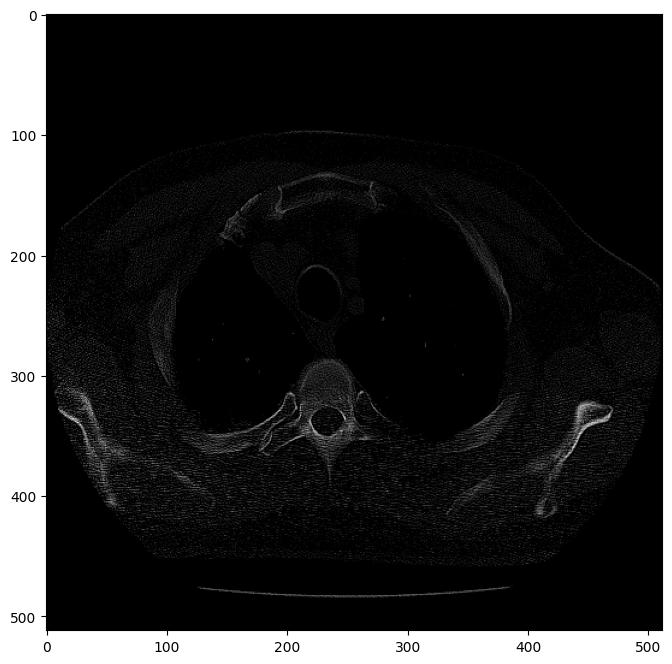

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(ex_img_bad,cmap="gray")
plt.show()

In [ ]:
ex_img_bad = ex_img_bad.astype("uint8")
ex_img_bad

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Applying Algorithm

In [82]:
def watershed_algorithm(grayscale_img):
  img2 = cv.merge((grayscale_img,grayscale_img,grayscale_img))
  ret, thresh = cv.threshold(grayscale_img,0,255,cv.THRESH_OTSU)

  # noise removal
  kernel = np.ones((5,5),np.uint8)
  opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 3)
  # sure background area
  sure_bg = cv.dilate(opening,kernel,iterations=5)
  # Finding sure foreground area
  dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
  ret, sure_fg = cv.threshold(dist_transform,0.08*dist_transform.max(),255,0)
  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv.subtract(sure_bg,sure_fg)

  # Marker labelling
  ret, markers = cv.connectedComponents(sure_fg)
  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1
  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0
  markers = cv.watershed(img2,markers)
  img2[markers == -1] = [255,255,0]
  plt.figure(figsize=[30,10])
  plt.subplot(151)
  plt.imshow(thresh, cmap = "gray")
  plt.title("Otsu Threshold")
  plt.subplot(152)
  plt.imshow(sure_fg, cmap = "gray")
  plt.title("Sure Foreground")
  plt.subplot(153)
  plt.imshow(sure_bg, cmap = "gray")
  plt.title("Sure Background")
  plt.subplot(154)
  plt.imshow(unknown, cmap = "gray")
  plt.title("Unknown Region")
  plt.subplot(155)
  plt.imshow(img2, cmap = "gray")
  plt.title("Result")
  plt.show()

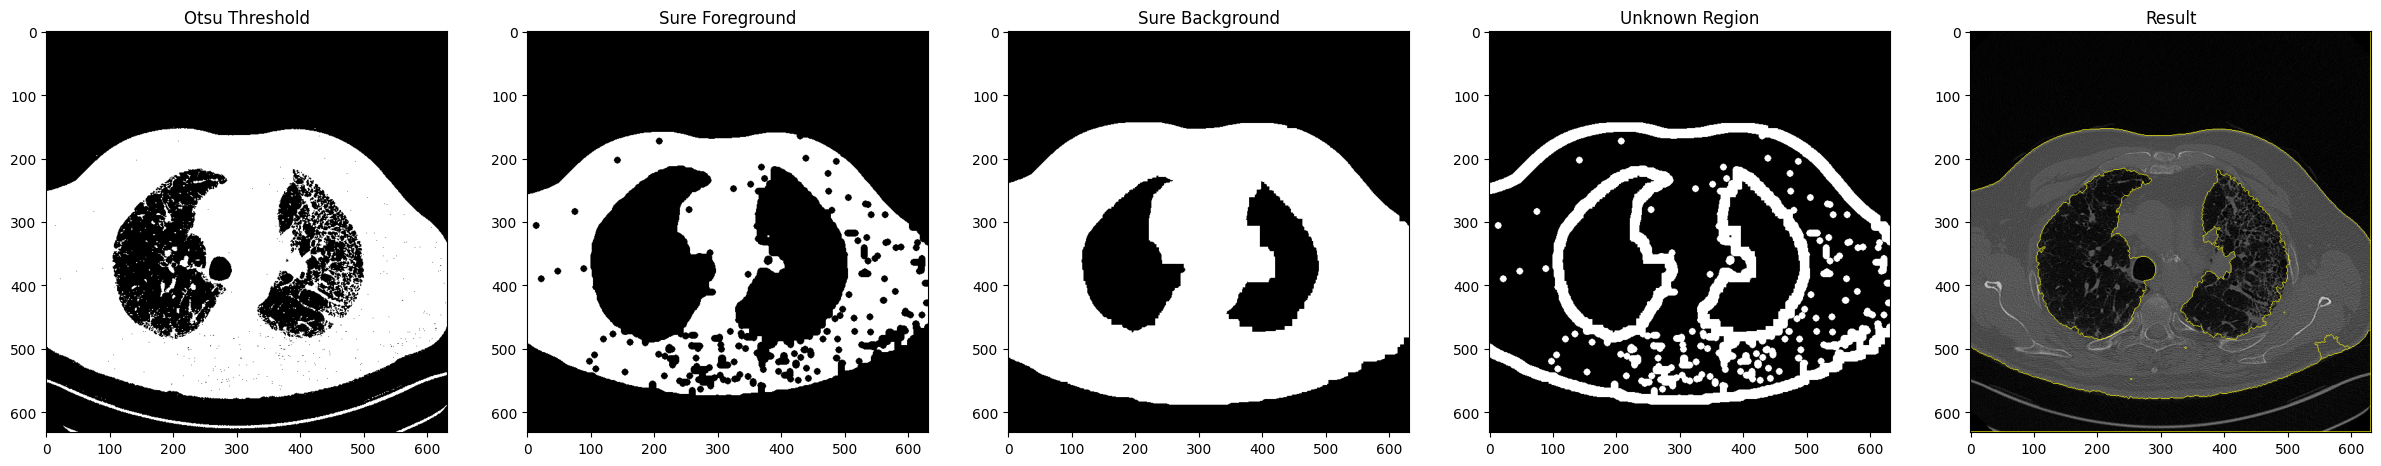

In [83]:
watershed_algorithm(ex_img_good)

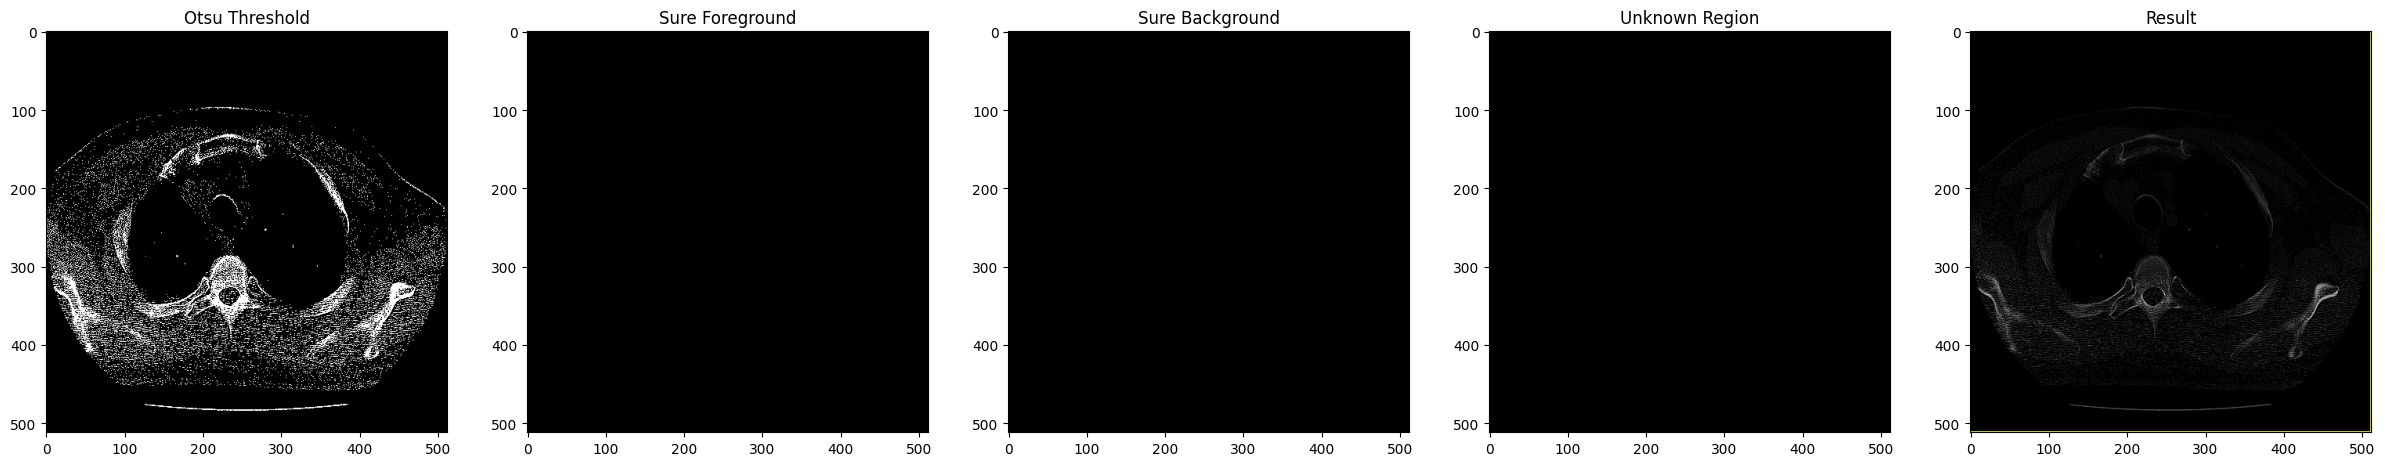

In [ ]:
watershed_algorithm(ex_img_bad)